In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahideseker/tweet-sentiment-classification-dataset")

print("Path to dataset files:", path)

c:\Users\mypc\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.31k/2.31k [00:00<00:00, 1.96MB/s]

Extracting files...
Path to dataset files: C:\Users\mypc\.cache\kagglehub\datasets\sahideseker\tweet-sentiment-classification-dataset\versions\1


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk


In [4]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
df = pd.read_csv(r'C:\Users\mypc\Desktop\Data analytics project\tweet_sentiment.csv')

In [8]:
# Display the first few rows of the dataset
print(df.head())



                           tweet sentiment
0      The event starts at 5 PM.   neutral
1    I hate how this turned out.  negative
2          Fantastic experience!  positive
3          Fantastic experience!  positive
4  This is the worst thing ever!  negative


In [10]:
# Check the column names of the dataset
print(df.columns)

# If the column name is different (e.g., 'tweet' instead of 'text'), update your code accordingly.


Index(['tweet', 'sentiment'], dtype='object')


In [12]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [14]:
# Preprocess the text data
df['tweet'] = df['tweet'].str.replace('[^a-zA-Z\s]', '', regex=True)
df['tweet'] = df['tweet'].str.lower()  # Convert to lowercase

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [15]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['tweet']).toarray()

In [16]:
#Encode the target variable
y = df['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [19]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [20]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [21]:
# Install the WordCloud library if you don't have it already
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/299.9 kB 454.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 473.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 473.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 473.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 554.9 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/299.9 kB 542.5 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 573.4 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


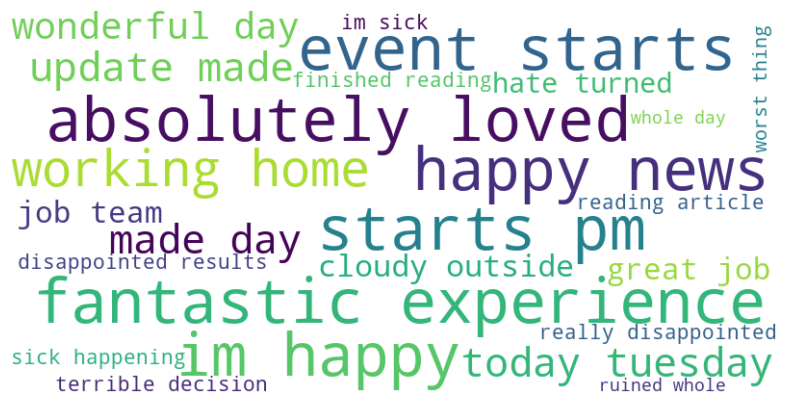

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into one string
text = ' '.join(df['tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\mypc\AppData\Local\Temp\ipykernel_15840\2839292511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


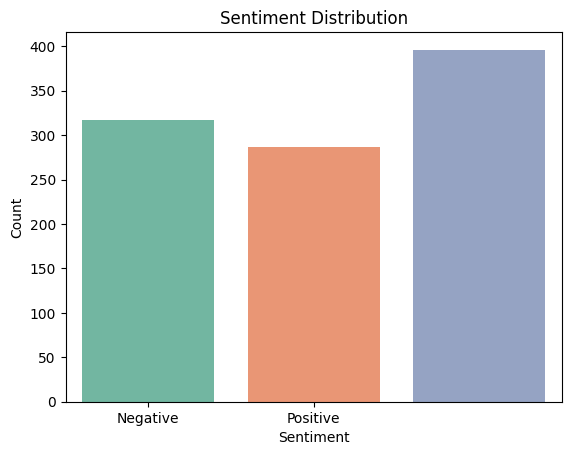

In [23]:
import seaborn as sns

# Plot the distribution of sentiments
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


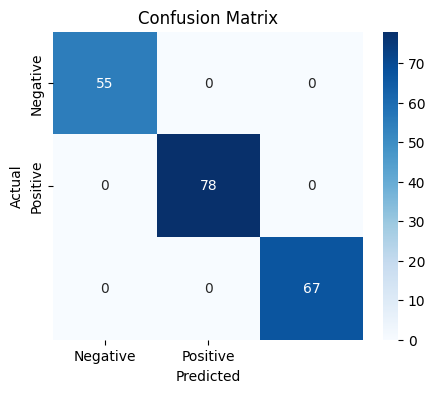

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\mypc\AppData\Local\Temp\ipykernel_15840\3200662971.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Set3')


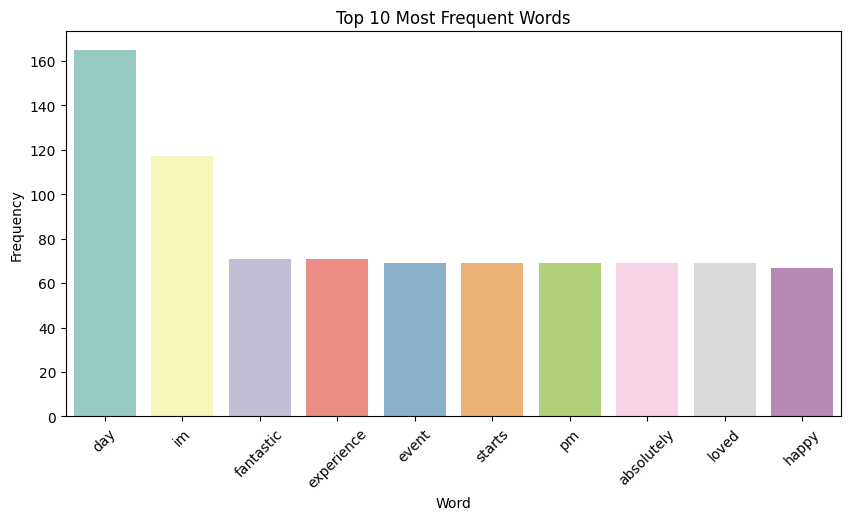

In [26]:
from collections import Counter

# Tokenize the words
words = ' '.join(df['tweet']).split()
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Extract words and their frequencies
words, counts = zip(*top_words)

# Plot a bar chart for the top 10 words
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='Set3')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
